In [1]:
from IPython import get_ipython

if get_ipython():
    get_ipython().run_line_magic("load_ext", "autoreload")
    get_ipython().run_line_magic("autoreload", "2")

In [2]:
import latenta as la
import laflow as laf

In [3]:
import tempfile

tmpdir = tempfile.TemporaryDirectory().name

model = laf.Model(project_root=tmpdir)

In [4]:
model.root_initial = la.Latent(
    p=la.distributions.Normal(la.Parameter(1.0)),
    q=la.distributions.Normal(-1.0, definition=[la.Dim(500, "dim")]),
    label="latent",
)

In [5]:
model.root_initial.plot()

In [6]:
model

In [7]:
model.infer_model()

assert model.root_.available()

▶️ | create_scheme                                                                                       
✅ | create_scheme                                                                                       
▶️ | infer_model                                                                                         


  0%|                                                                                                         …

  0%|                                                                                                         …

✅ | infer_model                                                                                         


In [8]:
model

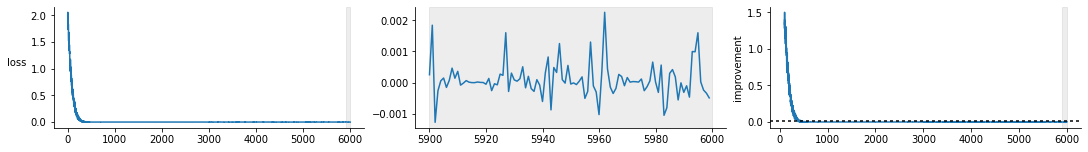

In [9]:
model.trace.plot();

In [10]:
posterior = la.posterior.scalar.ScalarObserved(model.root.q)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

As explained in [], {class}`laflow.Latenta`, you can provide a `db` which will avoid that any components stored in the posterior (in this case the model.root_) will be saved multiple times.

In [11]:
model.posterior = laf.Latenta(db={model.root_})
model.posterior = posterior

In [12]:
! ls -lh {model.path}/*.pkl

-rw-r--r-- 1 wsaelens updepla 7.2K Oct  2 16:31 /tmp/tmpuoqim055/posterior.pkl
-rw-r--r-- 1 wsaelens updepla  15K Oct  2 16:31 /tmp/tmpuoqim055/root.pkl
-rw-r--r-- 1 wsaelens updepla 976K Oct  2 16:31 /tmp/tmpuoqim055/trace.pkl


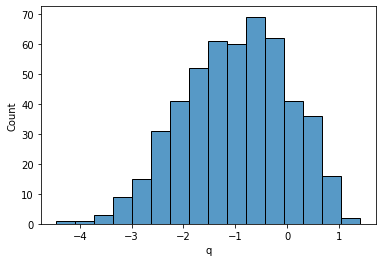

In [13]:
ax = model.posterior.plot()

In [14]:
model.q_distribution = ax

In [15]:
model